In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
df = pd.read_csv('../../Data/USAR/1.0.Mundo_poblacion_total.csv')
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
df.shape

(234, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020 Population,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015 Population,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010 Population,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000 Population,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990 Population,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980 Population,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970 Population,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


In [9]:
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [10]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [11]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
df.isnull()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


DATOS LIMPIOS

In [13]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

EDAS

<Axes: xlabel='2022 Population', ylabel='Count'>

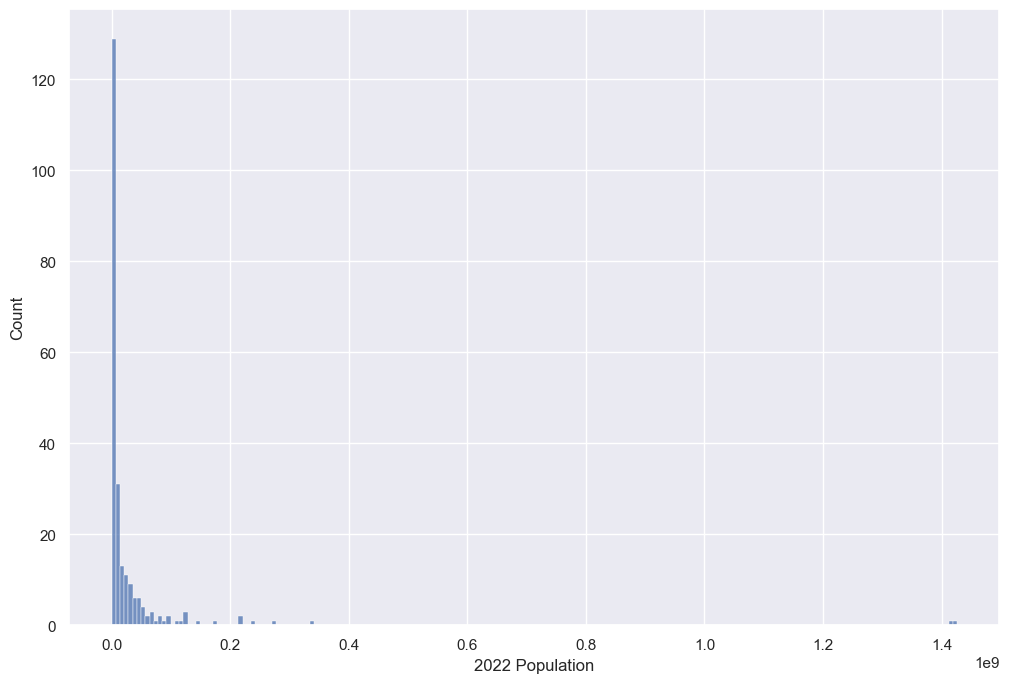

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='2022 Population')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Europe'),
  Text(5, 0, 'Oceania')])

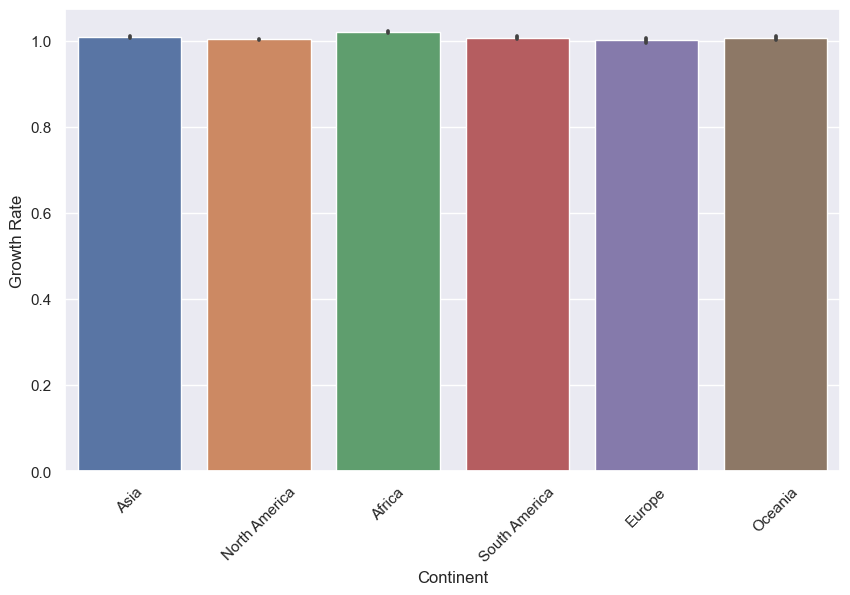

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('World Population Percentage', ascending=False), x='Continent', y='Growth Rate')
plt.xticks(rotation=45)

<Axes: xlabel='2020 Population', ylabel='Density (per km²)'>

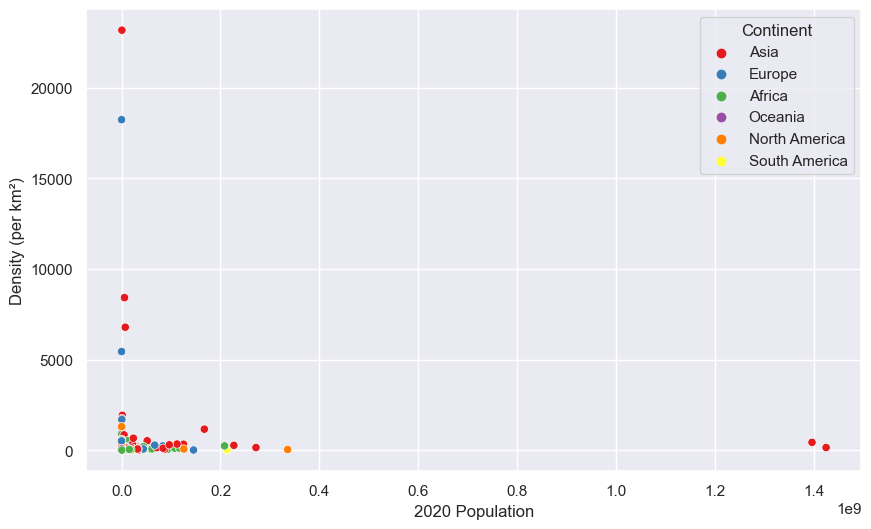

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='2020 Population', y ='Density (per km²)', hue='Continent', palette='Set1')

<Axes: xlabel='2020 Population', ylabel='World Population Percentage'>

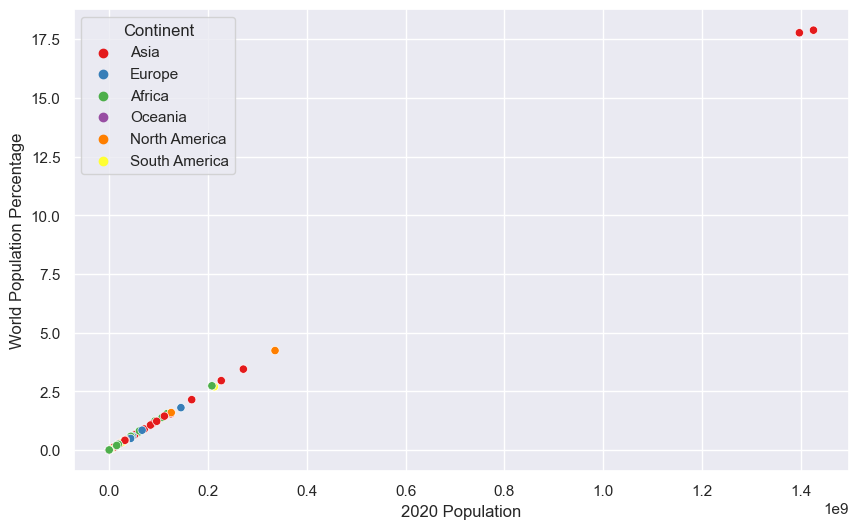

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='2020 Population', y ='World Population Percentage', hue='Continent', palette='Set1')

REGRESION LINEAL SIMPLE

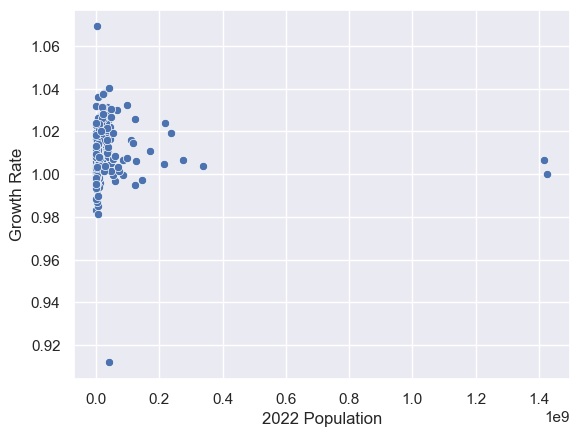

In [18]:
sns.scatterplot(data=df, x='2022 Population', y='Growth Rate');

In [19]:
X = df[['2022 Population']]
X[:3]
# df.iloc[:, 0]

,2022 Population
0,41128771
1,2842321
2,44903225


In [20]:
y = df[['Growth Rate']]
y[:3]

,Growth Rate
0,1.0257
1,0.9957
2,1.0164


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.predict([[8]]) 

c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.00964693]])

ANALISIS UNIVARIANTE

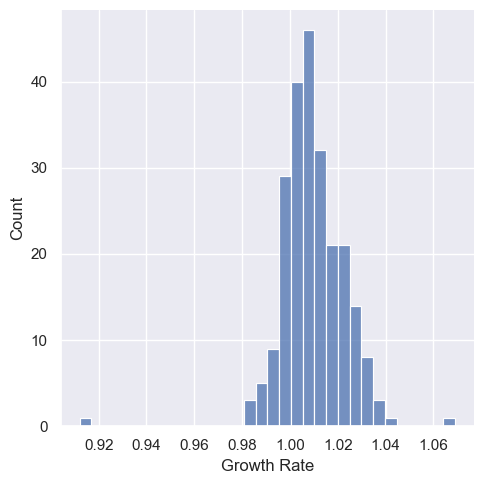

In [22]:
sns.displot(data=df, x="Growth Rate")

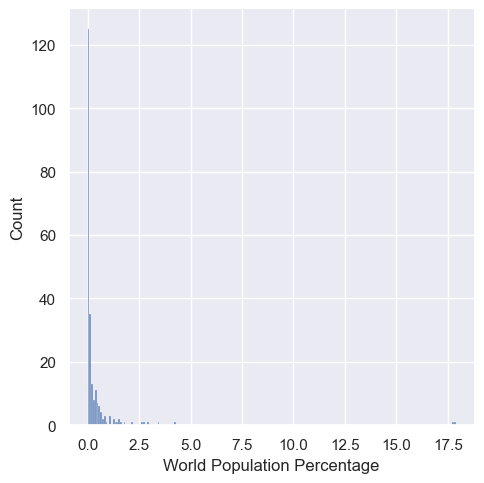

In [23]:
sns.displot(data=df, x="World Population Percentage")

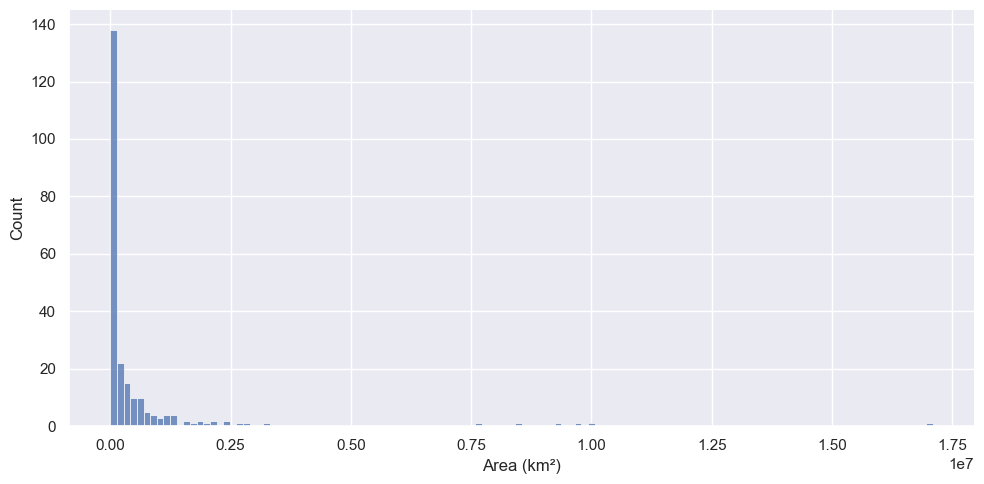

In [24]:
sns.displot(data=df, x="Area (km²)", height=5, aspect=2)

ANALISIS BIVARIANTE